In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
%matplotlib inline

import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/King_County_House_prices_dataset.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
print(df.tail())

               id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    9

In [6]:
df.groupby("yr_built").count()

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
yr_built                                                                 
1900       87    87     87        87         87           87        87   
1901       29    29     29        29         29           29        29   
1902       27    27     27        27         27           27        27   
1903       46    46     46        46         46           46        46   
1904       45    45     45        45         45           45        45   
...       ...   ...    ...       ...        ...          ...       ...   
2011      130   130    130       130        130          130       130   
2012      170   170    170       170        170          170       170   
2013      201   201    201       201        201          201       201   
2014      559   559    559       559        559          559       559   
2015       38    38     38        38         38           38        38   

          floors  waterfront  view  condition  grade  sqft_above  \
yr_built                                                           
1900          87          74    87         87     87          87   
1901          29          27    29         29     29          29   
1902          27          24    27         27     27          27   
1903          46          38    46         46     46          46   
1904          45          42    45         45     45          45   
...          ...         ...   ...        ...    ...         ...   
2011         130         116   130        130    130         130   
2012         170         145   170        170    170         170   
2013         201         186   200        201    201         201   
2014         559         496   558        559    559         559   
2015          38          33    38         38     38          38   

          sqft_basement  yr_renovated  zipcode  lat  long  sqft_living15  \
yr_built                                                                   
1900                 87            70       87   87    87             87   
1901                 29            23       29   29    29             29   
1902                 27            21       27   27    27             27   
1903                 46            33       46   46    46             46   
1904                 45            41       45   45    45             45   
...                 ...           ...      ...  ...   ...            ...   
2011                130           105      130  130   130            130   
2012                170           140      170  170   170            170   
2013                201           169      201  201   201            201   
2014                559           457      559  559   559            559   
2015                 38            28       38   38    38             38   

          sqft_lot15  
yr_built              
1900              87  
1901              29  
1902              27  
1903              46  
1904              45  
...              ...  
2011             130  
2012             170  
2013             201  
2014             559  
2015              38  

[116 rows x 20 columns]

In [7]:
df.groupby("yr_built").size()

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Length: 116, dtype: int64

In [8]:
# Definition of historical houses: houses that were built prior to 1950 
df_hist = df.query('yr_built < 1950')

In [9]:
df_hist.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
2   5631500400  2/25/2015  180000.0         2        1.0          770   
11  9212900260  5/27/2014  468000.0         2        1.0         1160   
12   114101516  5/28/2014  310000.0         3        1.0         1430   
14  1175000570  3/12/2015  530000.0         5        2.0         1810   
17  6865200140  5/29/2014  485000.0         4        1.0         1600   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
2      10000     1.0         0.0   0.0  ...      6         770            0.0   
11      6000     1.0         0.0   0.0  ...      7         860          300.0   
12     19901     1.5         0.0   0.0  ...      7        1430            0.0   
14      4850     1.5         0.0   0.0  ...      7        1810            0.0   
17      4300     1.5         0.0   0.0  ...      7        1600            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2      1933           NaN    98028  47.7379 -122.233           2720   
11     1942           0.0    98115  47.6900 -122.292           1330   
12     1927           NaN    98028  47.7558 -122.229           1780   
14     1900           0.0    98107  47.6700 -122.394           1360   
17     1916           0.0    98103  47.6648 -122.343           1610   

    sqft_lot15  
2         8062  
11        6000  
12       12697  
14        4850  
17        4300  

[5 rows x 21 columns]

In [10]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 2 to 21567
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4935 non-null   int64  
 1   date           4935 non-null   object 
 2   price          4935 non-null   float64
 3   bedrooms       4935 non-null   int64  
 4   bathrooms      4935 non-null   float64
 5   sqft_living    4935 non-null   int64  
 6   sqft_lot       4935 non-null   int64  
 7   floors         4935 non-null   float64
 8   waterfront     4383 non-null   float64
 9   view           4919 non-null   float64
 10  condition      4935 non-null   int64  
 11  grade          4935 non-null   int64  
 12  sqft_above     4935 non-null   int64  
 13  sqft_basement  4935 non-null   object 
 14  yr_built       4935 non-null   int64  
 15  yr_renovated   4009 non-null   float64
 16  zipcode        4935 non-null   int64  
 17  lat            4935 non-null   float64
 18  long   

4935 houses were built before 1950 - those are the ones of interest for Zach

In [11]:
df_hist.describe()

id         price     bedrooms    bathrooms   sqft_living  \
count  4.935000e+03  4.935000e+03  4935.000000  4935.000000   4935.000000   
mean   4.613196e+09  5.467876e+05     3.052077     1.626089   1680.408308   
std    2.858726e+09  3.829811e+05     1.127791     0.727291    804.978425   
min    1.200019e+06  7.800000e+04     1.000000     0.500000    370.000000   
25%    2.122549e+09  3.222500e+05     2.000000     1.000000   1110.000000   
50%    4.059400e+09  4.680000e+05     3.000000     1.500000   1520.000000   
75%    7.231502e+09  6.550000e+05     4.000000     2.000000   2070.000000   
max    9.900000e+09  7.700000e+06    33.000000     8.000000  12050.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  4.935000e+03  4935.000000  4383.000000  4919.000000  4935.000000   
mean   1.020371e+04     1.313475     0.011408     0.287254     3.648024   
std    3.996588e+04     0.394930     0.106208     0.832581     0.789526   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    4.277500e+03     1.000000     0.000000     0.000000     3.000000   
50%    5.635000e+03     1.000000     0.000000     0.000000     4.000000   
75%    7.740000e+03     1.500000     0.000000     0.000000     4.000000   
max    1.651359e+06     3.500000     1.000000     4.000000     5.000000   

             grade   sqft_above     yr_built  yr_renovated       zipcode  \
count  4935.000000  4935.000000  4935.000000   4009.000000   4935.000000   
mean      6.941236  1363.094428  1928.752178    233.624345  98115.770618   
std       1.030047   602.823122    14.639112    641.182759     40.241479   
min       3.000000   370.000000  1900.000000      0.000000  98001.000000   
25%       6.000000   940.000000  1917.000000      0.000000  98105.000000   
50%       7.000000  1220.000000  1928.000000      0.000000  98117.000000   
75%       7.000000  1640.000000  1942.000000      0.000000  98133.000000   
max      13.000000  8570.000000  1949.000000   2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15  
count  4935.000000  4935.000000    4935.000000    4935.000000  
mean     47.601462  -122.309116    1659.343262    8453.757244  
std       0.103691     0.096131     533.946214   19952.481457  
min      47.177600  -122.512000     460.000000     660.000000  
25%      47.534300  -122.365000    1310.000000    4344.500000  
50%      47.630500  -122.323000    1560.000000    5500.000000  
75%      47.680300  -122.288000    1880.000000    7541.500000  
max      47.776200  -121.325000    5500.000000  425581.000000

In [12]:
# df_hist["price"] = df_hist["price"].fillna(0.0).astype(int)

In [13]:
# for readability's sake change price from float to integer 
df_hist.loc[:, 'price'].fillna(0).astype(int)

2        180000
11       468000
12       310000
14       530000
17       485000
          ...  
21027    375000
21224    525000
21316    245000
21454    249000
21567    399950
Name: price, Length: 4935, dtype: int64

In [14]:
df_hist.describe()

id         price     bedrooms    bathrooms   sqft_living  \
count  4.935000e+03  4.935000e+03  4935.000000  4935.000000   4935.000000   
mean   4.613196e+09  5.467876e+05     3.052077     1.626089   1680.408308   
std    2.858726e+09  3.829811e+05     1.127791     0.727291    804.978425   
min    1.200019e+06  7.800000e+04     1.000000     0.500000    370.000000   
25%    2.122549e+09  3.222500e+05     2.000000     1.000000   1110.000000   
50%    4.059400e+09  4.680000e+05     3.000000     1.500000   1520.000000   
75%    7.231502e+09  6.550000e+05     4.000000     2.000000   2070.000000   
max    9.900000e+09  7.700000e+06    33.000000     8.000000  12050.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  4.935000e+03  4935.000000  4383.000000  4919.000000  4935.000000   
mean   1.020371e+04     1.313475     0.011408     0.287254     3.648024   
std    3.996588e+04     0.394930     0.106208     0.832581     0.789526   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    4.277500e+03     1.000000     0.000000     0.000000     3.000000   
50%    5.635000e+03     1.000000     0.000000     0.000000     4.000000   
75%    7.740000e+03     1.500000     0.000000     0.000000     4.000000   
max    1.651359e+06     3.500000     1.000000     4.000000     5.000000   

             grade   sqft_above     yr_built  yr_renovated       zipcode  \
count  4935.000000  4935.000000  4935.000000   4009.000000   4935.000000   
mean      6.941236  1363.094428  1928.752178    233.624345  98115.770618   
std       1.030047   602.823122    14.639112    641.182759     40.241479   
min       3.000000   370.000000  1900.000000      0.000000  98001.000000   
25%       6.000000   940.000000  1917.000000      0.000000  98105.000000   
50%       7.000000  1220.000000  1928.000000      0.000000  98117.000000   
75%       7.000000  1640.000000  1942.000000      0.000000  98133.000000   
max      13.000000  8570.000000  1949.000000   2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15  
count  4935.000000  4935.000000    4935.000000    4935.000000  
mean     47.601462  -122.309116    1659.343262    8453.757244  
std       0.103691     0.096131     533.946214   19952.481457  
min      47.177600  -122.512000     460.000000     660.000000  
25%      47.534300  -122.365000    1310.000000    4344.500000  
50%      47.630500  -122.323000    1560.000000    5500.000000  
75%      47.680300  -122.288000    1880.000000    7541.500000  
max      47.776200  -121.325000    5500.000000  425581.000000

In [15]:
# define price per sqft, using living area only 

df_hist['price_per_sqft'] = df_hist.apply(lambda row: row['price'] / row['sqft_living'], axis=1)

<ipython-input-15-f37d06be7be0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist['price_per_sqft'] = df_hist.apply(lambda row: row['price'] / row['sqft_living'], axis=1)


In [16]:
df_hist.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
2   5631500400  2/25/2015  180000.0         2        1.0          770   
11  9212900260  5/27/2014  468000.0         2        1.0         1160   
12   114101516  5/28/2014  310000.0         3        1.0         1430   
14  1175000570  3/12/2015  530000.0         5        2.0         1810   
17  6865200140  5/29/2014  485000.0         4        1.0         1600   

    sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
2      10000     1.0         0.0   0.0  ...         770            0.0   
11      6000     1.0         0.0   0.0  ...         860          300.0   
12     19901     1.5         0.0   0.0  ...        1430            0.0   
14      4850     1.5         0.0   0.0  ...        1810            0.0   
17      4300     1.5         0.0   0.0  ...        1600            0.0   

    yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
2       1933          NaN    98028  47.7379 -122.233           2720   
11      1942          0.0    98115  47.6900 -122.292           1330   
12      1927          NaN    98028  47.7558 -122.229           1780   
14      1900          0.0    98107  47.6700 -122.394           1360   
17      1916          0.0    98103  47.6648 -122.343           1610   

    sqft_lot15  price_per_sqft  
2         8062      233.766234  
11        6000      403.448276  
12       12697      216.783217  
14        4850      292.817680  
17        4300      303.125000  

[5 rows x 22 columns]

In [17]:
# Take a first look at correlations 
# price per sqft should be highly correlated to price 

df_hist.corr(method="pearson")

id     price  bedrooms  bathrooms  sqft_living  \
id              1.000000 -0.008926  0.009955  -0.012231    -0.011745   
price          -0.008926  1.000000  0.359303   0.606936     0.768319   
bedrooms        0.009955  0.359303  1.000000   0.517873     0.578260   
bathrooms      -0.012231  0.606936  0.517873   1.000000     0.772613   
sqft_living    -0.011745  0.768319  0.578260   0.772613     1.000000   
sqft_lot       -0.080853 -0.008582  0.026084   0.004636     0.034830   
floors         -0.012561  0.484960  0.439315   0.503067     0.573780   
waterfront     -0.003806  0.226649  0.006222   0.085485     0.115710   
view           -0.028377  0.373457  0.074970   0.249575     0.304439   
condition       0.015086  0.158081  0.134399   0.217871     0.190488   
grade           0.001366  0.748541  0.374949   0.592641     0.710900   
sqft_above     -0.024367  0.721572  0.538101   0.656882     0.867227   
yr_built       -0.031806 -0.171026 -0.113925  -0.123026    -0.126501   
yr_renovated   -0.022091  0.170369  0.090375   0.286339     0.231543   
zipcode         0.014083  0.001117 -0.009106   0.010344     0.004768   
lat             0.064389  0.270482  0.072842   0.109470     0.115522   
long           -0.023638 -0.113242  0.002146  -0.058864    -0.030264   
sqft_living15  -0.073876  0.674464  0.286907   0.469808     0.622888   
sqft_lot15     -0.101411 -0.032495 -0.004945  -0.002949     0.034573   
price_per_sqft  0.011972  0.500744 -0.148177  -0.007455    -0.067728   

                sqft_lot    floors  waterfront      view  condition     grade  \
id             -0.080853 -0.012561   -0.003806 -0.028377   0.015086  0.001366   
price          -0.008582  0.484960    0.226649  0.373457   0.158081  0.748541   
bedrooms        0.026084  0.439315    0.006222  0.074970   0.134399  0.374949   
bathrooms       0.004636  0.503067    0.085485  0.249575   0.217871  0.592641   
sqft_living     0.034830  0.573780    0.115710  0.304439   0.190488  0.710900   
sqft_lot        1.000000 -0.009844    0.038152  0.067908  -0.013372 -0.027925   
floors         -0.009844  1.000000    0.058942  0.170953   0.091654  0.529316   
waterfront      0.038152  0.058942    1.000000  0.437877   0.004345  0.074144   
view            0.067908  0.170953    0.437877  1.000000   0.039308  0.301629   
condition      -0.013372  0.091654    0.004345  0.039308   1.000000  0.133064   
grade          -0.027925  0.529316    0.074144  0.301629   0.133064  1.000000   
sqft_above      0.065106  0.699321    0.125934  0.274102   0.102579  0.679307   
yr_built        0.030806 -0.305467    0.026755  0.010335  -0.074727 -0.135644   
yr_renovated    0.033614  0.206486    0.115496  0.133561  -0.181660  0.215073   
zipcode        -0.174026 -0.019284   -0.043948  0.050424  -0.087830  0.116902   
lat            -0.155470  0.066816   -0.071117 -0.052179  -0.008693  0.273676   
long            0.248821 -0.016664   -0.023500 -0.049548   0.012083 -0.186362   
sqft_living15   0.090630  0.379602    0.142204  0.415096   0.088912  0.597144   
sqft_lot15      0.537663 -0.029711    0.086518  0.087940  -0.006543 -0.044220   
price_per_sqft -0.055748  0.049307    0.156899  0.185975   0.034279  0.290927   

                sqft_above  yr_built  yr_renovated   zipcode       lat  \
id               -0.024367 -0.031806     -0.022091  0.014083  0.064389   
price             0.721572 -0.171026      0.170369  0.001117  0.270482   
bedrooms          0.538101 -0.113925      0.090375 -0.009106  0.072842   
bathrooms         0.656882 -0.123026      0.286339  0.010344  0.109470   
sqft_living       0.867227 -0.126501      0.231543  0.004768  0.115522   
sqft_lot          0.065106  0.030806      0.033614 -0.174026 -0.155470   
floors            0.699321 -0.305467      0.206486 -0.019284  0.066816   
waterfront        0.125934  0.026755      0.115496 -0.043948 -0.071117   
view              0.274102  0.010335      0.133561  0.050424 -0.052179   
condition         0.102579 -0.074727     -0.181660 -0.087830 -0.008

In [18]:
# correlation between price and price per sqft (living) is not high, so there need to be other spatial parameters that need to be incorporated 
# df_hist['total_sqft'] = df_hist.apply(lambda row: row['sqft_living'] + row['sqft_lot'], axis=1)

/Users/julianeberek/neuefische/ds-housing-analysis/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


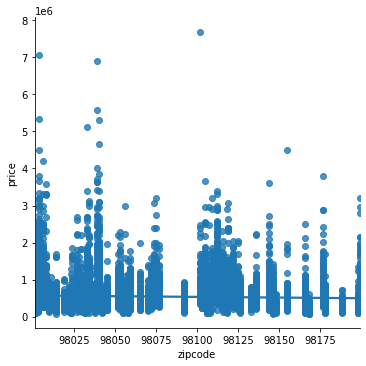

In [26]:
sns.lmplot('zipcode', 'price',data=df);

/Users/julianeberek/neuefische/ds-housing-analysis/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


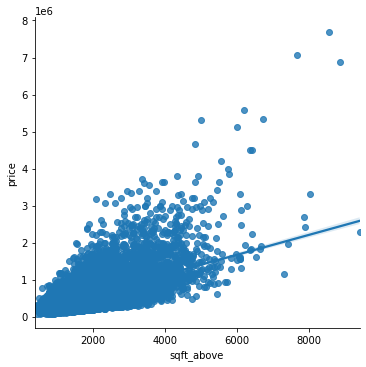

In [27]:
sns.lmplot('sqft_above', 'price',data=df);

/Users/julianeberek/neuefische/ds-housing-analysis/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


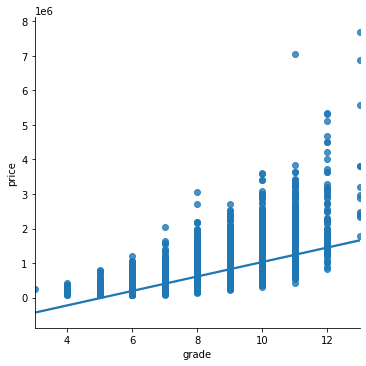

In [28]:
sns.lmplot('grade', 'price',data=df);

In [24]:
# Define best NHs: investigate relationship between zipcodes and prices / sqft_lot15

import statsmodels.formula.api as smf

smf.ols(formula='price ~ zipcode', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Fri, 28 May 2021   Prob (F-statistic):           4.06e-15
Time:                        18:44:35   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
import statsmodels.formula.api as smf

smf.ols(formula='sqft_lot15 ~ price', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_lot15   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.30e-34
Time:                        18:45:15   Log-Likelihood:            -2.5116e+05
No. Observations:               21597   AIC:                         5.023e+05
Df Residuals:                   21595   BIC:                         5.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9435.1137    328.952     28.682      0.000    8790.344    1.01e+04
price          0.0062      0.001     12.216      0.000       0.005       0.007
==============================================================================
Omnibus:                    32974.838   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20859823.685
Skew:                           9.523   Prob(JB):                         0.00
Kurtosis:                     154.056   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""